In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
raw_data = pd.read_csv('AirQuality.csv',sep=';')

In [3]:
rows_important = raw_data.loc[6:173]
raw_data_final = rows_important[['Date','Time','CO(GT)','T']]
raw_data_final = raw_data_final.apply(lambda x: x.str.replace(',','.'))

In [4]:
raw_data_final.to_csv('AirQuality_final.csv')

In [5]:
df = pd.read_csv('AirQuality_final.csv')
df.head()

,Unnamed: 0,Date,Time,CO(GT),T
0,6,11/03/2004,00.00.00,1.2,11.3
1,7,11/03/2004,01.00.00,1.0,10.7
2,8,11/03/2004,02.00.00,0.9,10.7
3,9,11/03/2004,03.00.00,0.6,10.3
4,10,11/03/2004,04.00.00,-200.0,10.1


In [6]:
fin = df.drop(['Unnamed: 0','Date','Time'],axis='columns')

In [7]:
fin = fin[fin['CO(GT)']!=-200]

In [8]:
fin.to_csv('AirQuality_final.csv')

In [9]:
df = pd.read_csv('AirQuality_final.csv')
df.head()

,Unnamed: 0,CO(GT),T
0,0,1.2,11.3
1,1,1.0,10.7
2,2,0.9,10.7
3,3,0.6,10.3
4,5,0.7,11.0


In [10]:
test_data = pd.read_csv('AirQuality.csv',sep=';')
rows_important = test_data.loc[174:197]
test_data = rows_important[['T']]
test_data = test_data.apply(lambda x: x.str.replace(',','.'))
test_data = pd.to_numeric(test_data['T']).to_list()

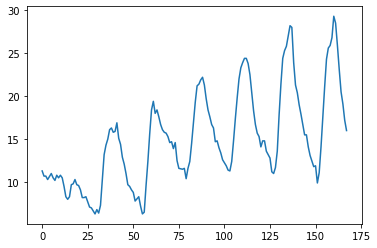

In [14]:
plt.plot(df['Unnamed: 0'],df['T'])

In [15]:
CO = np.array(df['CO(GT)'])
T = np.array(df['T'])

<IPython.core.display.Javascript object>


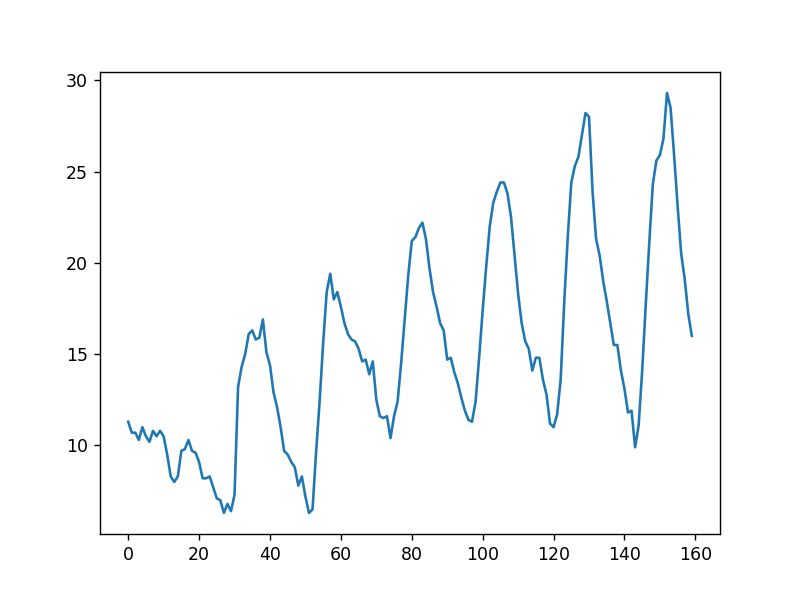

In [17]:
%matplotlib notebook
plt.plot(T)

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

<IPython.core.display.Javascript object>


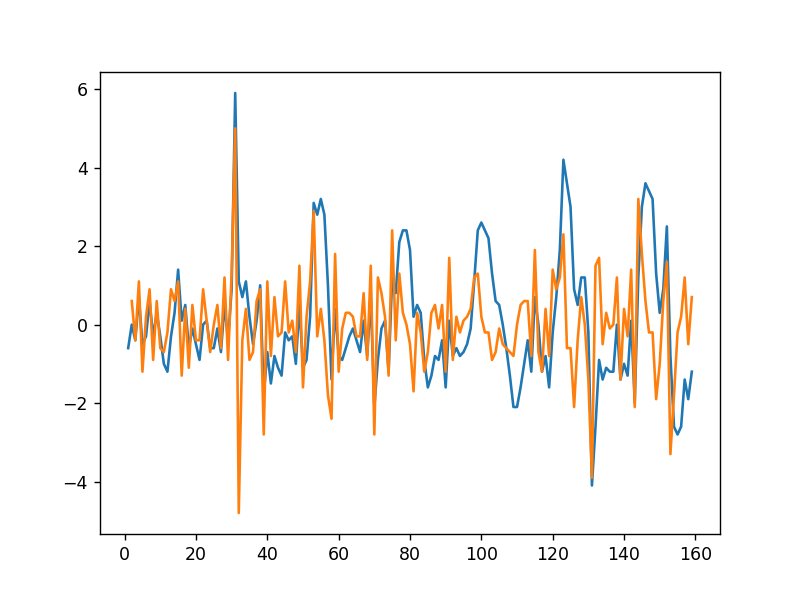

(0.02955974842767294, -0.003797468354430366)

In [19]:
%matplotlib notebook
plt.plot(df['T'].diff().dropna())
#plt.show()
plt.plot(df['T'].diff().diff().dropna())
plt.show()
df['T'].diff().dropna().mean(),df['T'].diff().diff().dropna().mean()

<IPython.core.display.Javascript object>


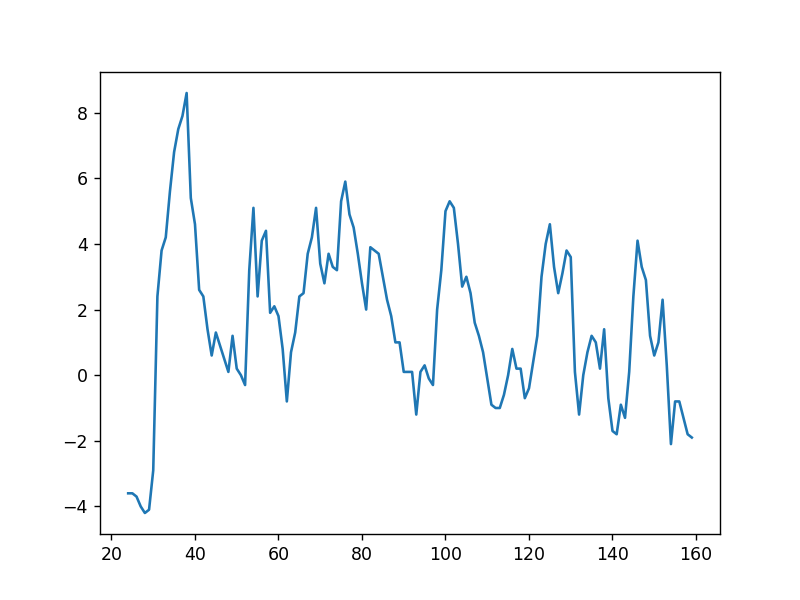

In [20]:
%matplotlib notebook
sdiff = (df['T']-df['T'].shift(24)).dropna()
plt.plot(sdiff)

<IPython.core.display.Javascript object>


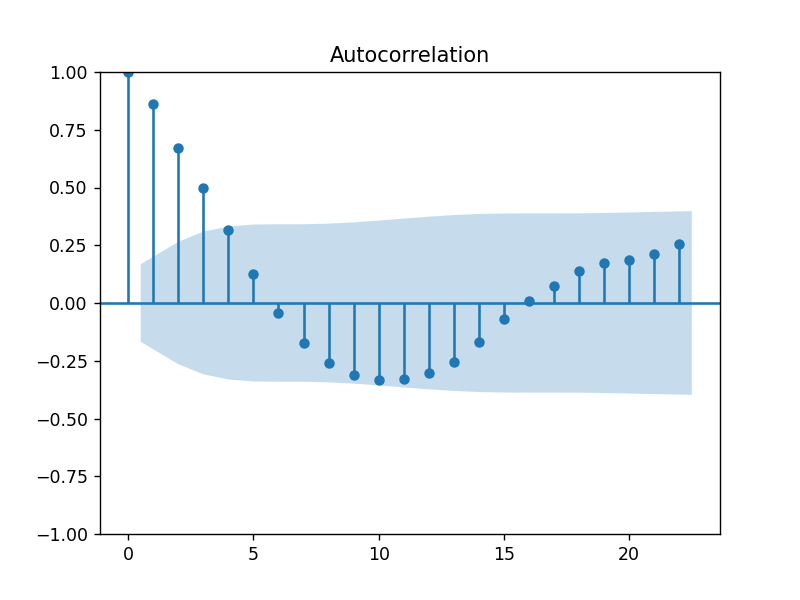

<IPython.core.display.Javascript object>


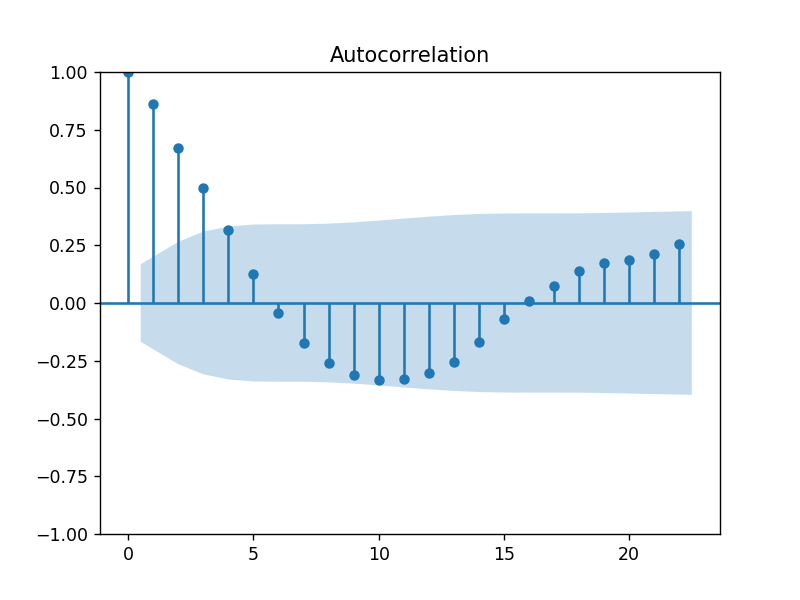

In [21]:
%matplotlib notebook
plot_acf(sdiff)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


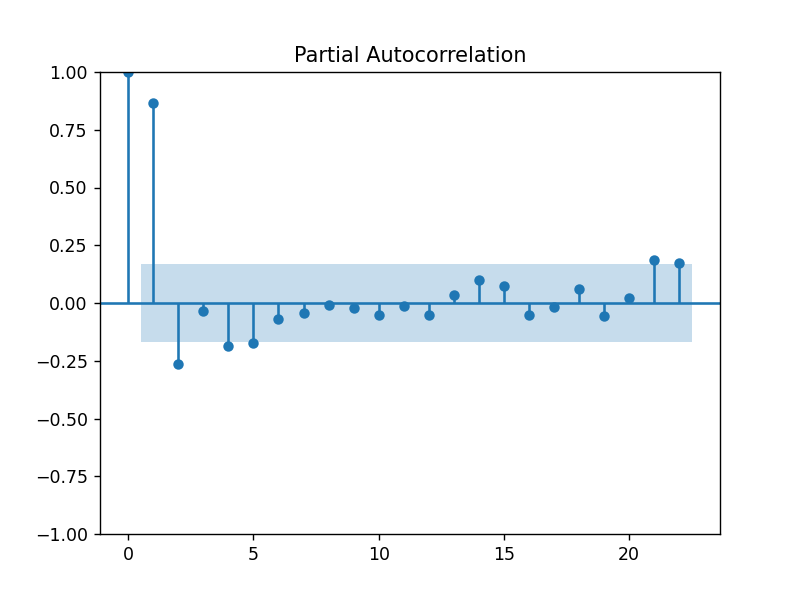

<IPython.core.display.Javascript object>


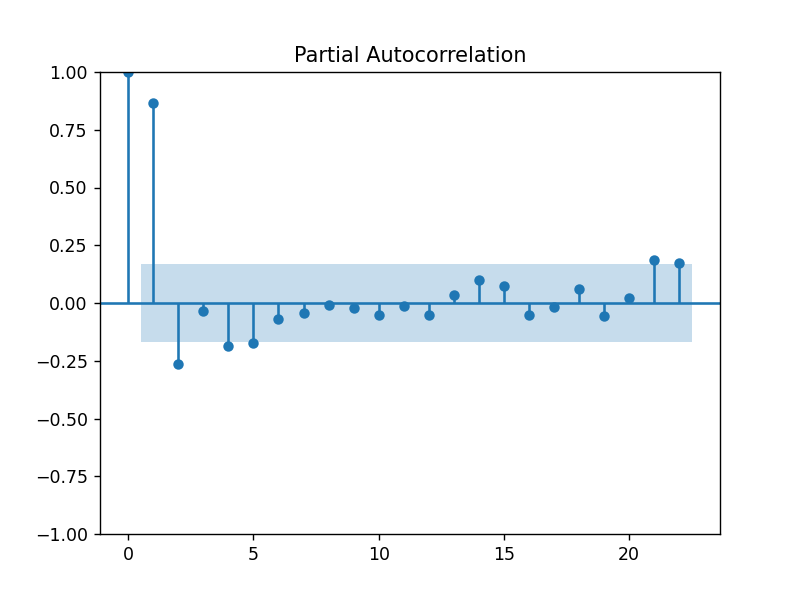

In [22]:
%matplotlib notebook
plot_pacf(sdiff)

In [23]:
p=2
q=3
d=1

In [24]:
model = SARIMAX(T,order=(p,d,q),seasonal_order=(p,d,q,24))
results = model.fit()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
g = results.predict(start=1,end=len(T))
g.shape

(160,)

<IPython.core.display.Javascript object>


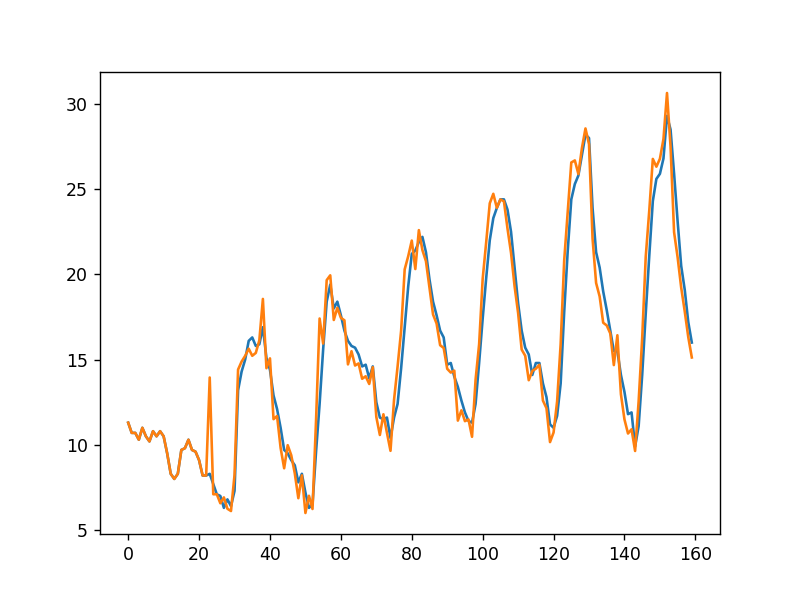

In [31]:
x = np.linspace(0,len(T)-1+24,len(T)+24)
%matplotlib notebook
plt.plot(T)
plt.plot(g)
#plt.legend(['Fit','Actual'])

In [32]:
g = results.predict(start=len(T)+1,end=len(T)+24)

<IPython.core.display.Javascript object>


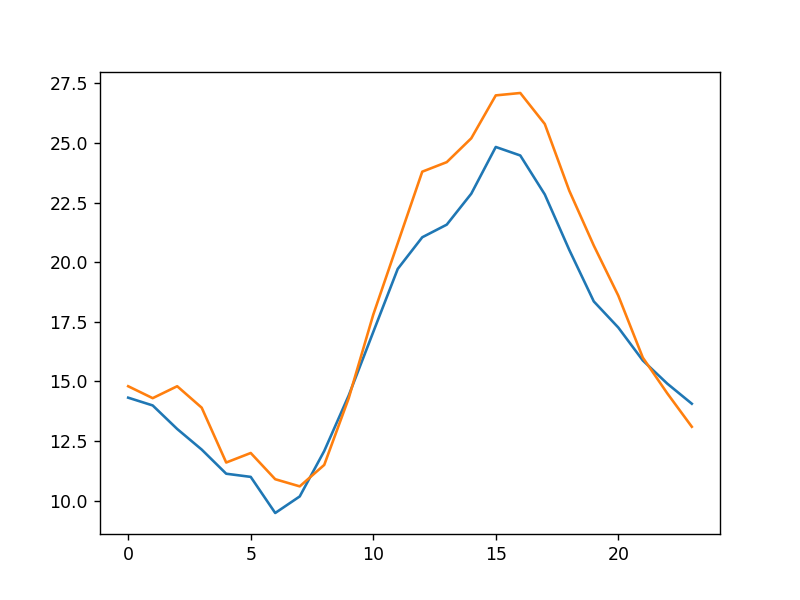

In [33]:
%matplotlib notebook
plt.plot(g)
plt.plot(test_data)

In [29]:
MSE = np.dot(g-test_data,(g-test_data).T)/len(g)
RMSE = np.sqrt(MSE)
MAE = np.sum(np.abs(g-test_data))/len(g)
MSE,RMSE,MAE

(2.7818689439186906, 1.6678935649251394, 1.3851209164546967)